In [51]:
import cooler

In [52]:
c1 = cooler.Cooler('/home/sun/data/work/akita/results/coolers_library/akita.hg38.mapq_30.2048.mcool::/resolutions/2048')

In [50]:
c1.pixels()[:].to_csv("hg38.mapq_30.2048.matrix",index=False,header=None,sep="\t")

In [16]:
c1.bins()[:].index += 1

In [42]:
df = c1.bins()[:]

In [43]:
df.index += 1

In [44]:
df["bin_id"] = df.index

In [47]:
df.drop("weight",axis=1, inplace=True)

In [49]:
df.to_csv("hg38.mapq_30.2048.bed",index=False,header=None,sep="\t")

In [38]:
arr = c1.matrix(balance=False)[100:120, 100:120]
arr

array([[3273., 1087., 1023., 1006.,  699.,  544.,  676.,  502.,  516.,
         533.,  552.,  569.,  509.,  404.,  416.,  381.,  352.,  382.,
         346.,  312.],
       [1087., 2593.,  934.,  833.,  625.,  506.,  588.,  455.,  463.,
         477.,  480.,  482.,  408.,  353.,  398.,  374.,  296.,  360.,
         310.,  287.],
       [1023.,  934., 4574., 2481., 1042.,  853.,  974.,  666.,  698.,
         792.,  719.,  877.,  622.,  615.,  550.,  575.,  410.,  435.,
         370.,  301.],
       [1006.,  833., 2481., 5794., 1993., 1241., 1529., 1172., 1028.,
        1246., 1121., 1284., 1033.,  783.,  810.,  794.,  517.,  538.,
         434.,  365.],
       [ 699.,  625., 1042., 1993., 3672., 1374., 1394.,  992.,  925.,
        1002.,  874., 1020.,  724.,  592.,  635.,  589.,  451.,  480.,
         391.,  351.],
       [ 544.,  506.,  853., 1241., 1374., 3772., 1517.,  914.,  866.,
         906.,  804.,  900.,  680.,  570.,  551.,  534.,  411.,  466.,
         356.,  309.],
       [ 6

In [81]:
mat = c1.matrix(balance=True,sparse=True).fetch("chr12:63280000-64330000")
mat

<514x514 sparse matrix of type '<class 'numpy.float64'>'
	with 98145 stored elements in COOrdinate format>

In [82]:
arr = mat.toarray()
arr

array([[0.06419633, 0.02258399, 0.01209627, ..., 0.        , 0.        ,
        0.        ],
       [0.02258399, 0.03425862, 0.02947016, ..., 0.        , 0.        ,
        0.        ],
       [0.01209627, 0.02947016, 0.04268787, ..., 0.        , 0.00058699,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.18149865, 0.01065683,
        0.00675213],
       [0.        , 0.        , 0.00058699, ..., 0.01065683, 0.05206221,
        0.0117285 ],
       [0.        , 0.        , 0.        , ..., 0.00675213, 0.0117285 ,
        0.04557759]])

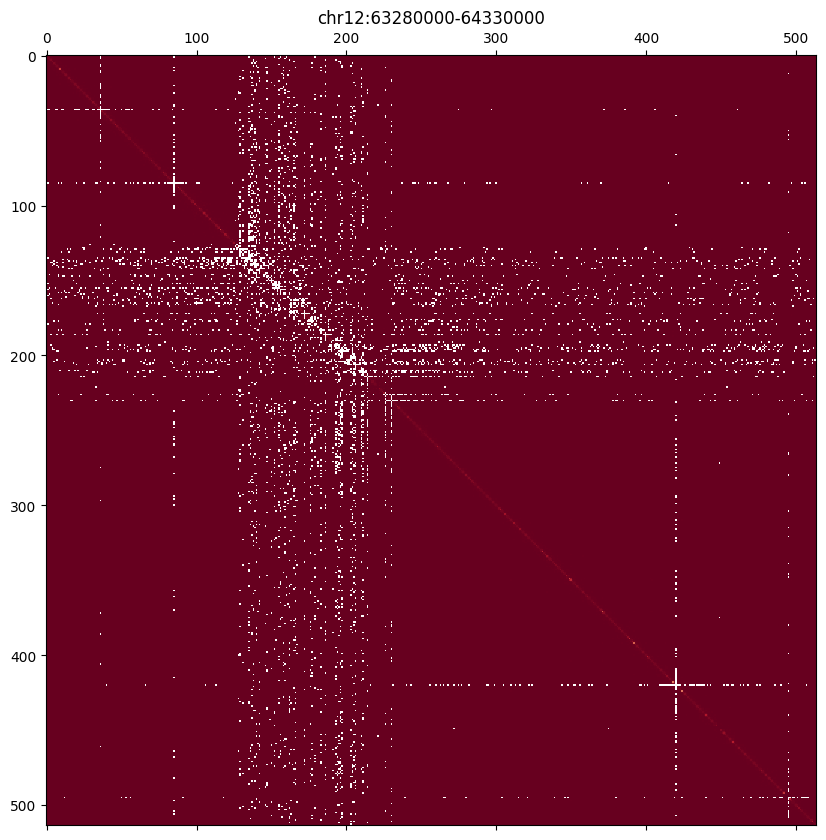

In [105]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.title("chr12:63280000-64330000")
im = ax.matshow(arr,vmin=0, vmax=2, cmap='RdBu')
# fig.colorbar(im)

In [25]:
cis = c1.matrix(sparse=True).fetch('chr2:10,000,000-20,000,000')

In [28]:
##尝试从hic-pro文件中计算不同分辨率
##生成人类基因组bin_size文件
import math

bin_size = 1024

with open("/home/sun/data/genome_index/bowtie/hg19/hg19.chrom.sizes", "r") as f_in, open("human_genome_bins.txt", "w") as f_out:
    for line in f_in:
        chrom, length = line.strip().split("\t")
        length = int(length)
        n_bins = math.ceil(length / bin_size)
        for i in range(n_bins):
            start = i * bin_size + 1
            end = min((i + 1) * bin_size, length)
            bin_id = f"{chrom}_{i+1}"
            f_out.write(f"{chrom}\t{start}\t{end}\t{bin_id}\n")

In [30]:
chrom_sizes = {}
with open("/home/sun/data/genome_index/bowtie/hg19/hg19.chrom.sizes", "r") as f:
    for line in f:
        chrom, size = line.strip().split()
        chrom_sizes[chrom] = int(size)
bin_size = 2048
with open("/home/sun/data/work/akita/Result/SRR165870/hic_results/data/1/hg19.2048.bed", "w") as f:
    bin_num = 1
    for chrom in chrom_sizes:
        chrom_size = chrom_sizes[chrom]
        bin_start = 0
        bin_end = bin_size
        while bin_end <= chrom_size:
            f.write(f"{chrom}\t{bin_start}\t{bin_end}\tbin{bin_num}\n")
            bin_start += bin_size
            bin_end += bin_size
            bin_num += 1
        if bin_start < chrom_size:
            f.write(f"{chrom}\t{bin_start}\t{chrom_size}\tbin{bin_num}\n")